<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/11%EC%9B%94_24%EC%9D%BC_(%EA%B8%88)_Day_57.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X_filter

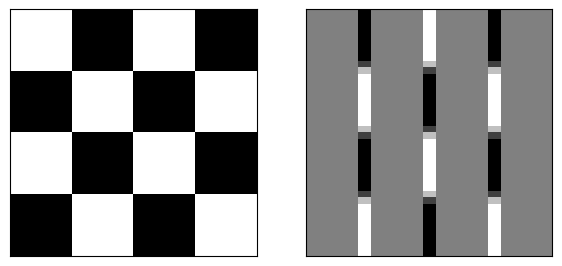

In [29]:
import numpy as np
import matplotlib.pyplot as plt

white_patch = 255*np.ones(shape=(10,10))
black_patch = 0*np.ones(shape=(10,10))

img1 = np.tile(np.hstack([white_patch, black_patch]), reps=[1,2])
img2 = np.tile(np.hstack([black_patch, white_patch]), reps=[1,2])
img = np.tile(np.vstack([img1, img2]), reps=[2,1])

data = img
X_filter = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

L = len(data)
W = 3

H_ = len(data)-W+1
W_ = len(data)-W+1

result = np.zeros((H_, W_))

for row_idx in range(H_):
    for col_idx in range(W_):
        window = data[row_idx:row_idx+W, col_idx:col_idx+W]
        filtered_value = np.sum(window*X_filter)
        result[row_idx][col_idx] = filtered_value

fig, axes = plt.subplots(1,2,figsize=(7,7))
axes[0].imshow(img, cmap='gray')
axes[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

axes[1].imshow(result, cmap='gray')
axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# Y_filter

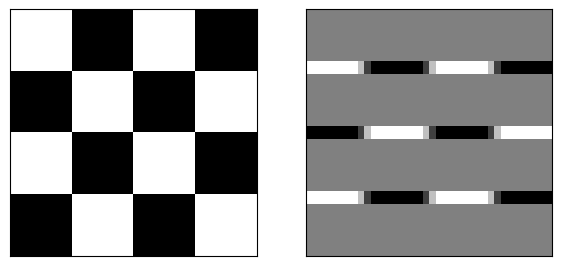

In [31]:
import numpy as np
import matplotlib.pyplot as plt

white_patch = 255*np.ones(shape=(10,10))
black_patch = 0*np.ones(shape=(10,10))

img1 = np.tile(np.hstack([white_patch, black_patch]), reps=[1,2])
img2 = np.tile(np.hstack([black_patch, white_patch]), reps=[1,2])
img = np.tile(np.vstack([img1, img2]), reps=[2,1])

data = img
Y_filter = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

L = len(data)
W = 3

H_ = len(data)-W+1
W_ = len(data)-W+1

result = np.zeros((H_, W_))

for row_idx in range(H_):
    for col_idx in range(W_):
        window = data[row_idx:row_idx+W, col_idx:col_idx+W]
        filtered_value = np.sum(window*Y_filter)
        result[row_idx][col_idx] = filtered_value

fig, axes = plt.subplots(1,2,figsize=(7,7))
axes[0].imshow(img, cmap='gray')
axes[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

axes[1].imshow(result, cmap='gray')
axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

#Image로 filtering 해보기

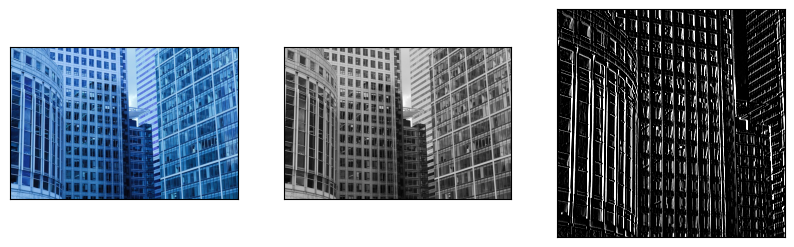

In [55]:
import pandas as pd
from PIL import Image

img_path = "/content/architecture-22039_640.jpg"
img = Image.open(img_path)
gray_img = img.convert('L')

data = np.array(gray_img)
X_filter = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

L = len(data)
W = 3

H_ = len(data)-W+1
W_ = len(data)-W+1

result = np.zeros((H_, W_))

for row_idx in range(H_):
    for col_idx in range(W_):
        window = data[row_idx:row_idx+W, col_idx:col_idx+W]
        filtered_value = np.sum(window*X_filter)
        result[row_idx][col_idx] = filtered_value

fig, axes = plt.subplots(1,3,figsize=(10,10))

axes[0].imshow(img)
axes[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

axes[1].imshow(gray_img, cmap='gray')
axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

#이미지의 픽셀 값 범위가 넓거나 좁은 경우, 그리고 이미지의 명암 대비를 높이기 위해서 vmax, vmin 설정
#255 이상이면 흰색으로 처리
#음수 값이면 검은색으로 처리
axes[2].imshow(result, cmap='gray', vmin=0, vmax=255)
axes[2].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

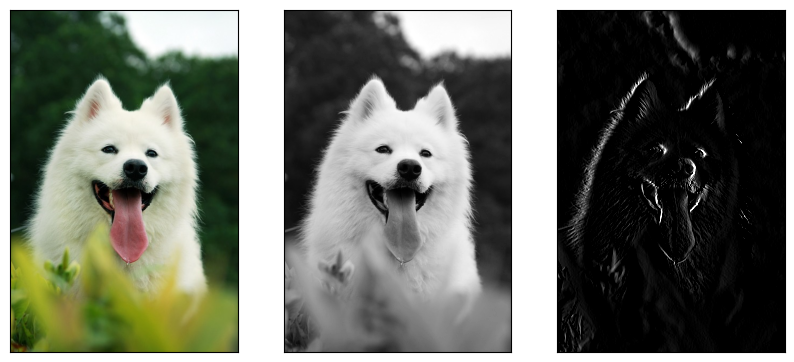

In [61]:
import pandas as pd
from PIL import Image

img_path = "/content/samoyed-2765553_640.jpg"
img = Image.open(img_path)
gray_img = img.convert('L')

data = np.array(gray_img)
X_filter = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

L = len(data)
W = 3

H_ = len(data)-W+1
W_ = len(data[0])-W+1

result = np.zeros((H_, W_))

for row_idx in range(H_):
    for col_idx in range(W_):
        window = data[row_idx:row_idx+W, col_idx:col_idx+W]
        filtered_value = np.sum(window*X_filter)
        result[row_idx][col_idx] = filtered_value

fig, axes = plt.subplots(1,3,figsize=(10,10))

axes[0].imshow(img)
axes[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

axes[1].imshow(gray_img, cmap='gray')
axes[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

#이미지의 픽셀 값 범위가 넓거나 좁은 경우, 그리고 이미지의 명암 대비를 높이기 위해서 vmax, vmin 설정
#255 이상이면 흰색으로 처리
#음수 값이면 검은색으로 처리
axes[2].imshow(result, cmap='gray', vmin=0, vmax=255)
axes[2].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

#  Convolutional Neural Networks

##nn.Conv2d

In [1]:
import torch
import torch.nn as nn

H, W = 100,150
input_tensor = torch.randn(size=(1,H,W))

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
output_tensor = conv(input_tensor)
#kernel 개수 = 1개 -> output channel 개수 = 1
#input = (1,100,150) => output = (1,98,148)